In [1]:
import numpy as np

class neuralLayer:
    def __init__(self):
        pass

    def forward( self, input: np.ndarray ) -> np.ndarray:
        return input
        
    def backward( self, error: np.ndarray ) -> np.ndarray:
        return error
    
    def updateWeights( self, learningRate: float ):
        return

In [2]:
import numpy as np

"""
Class definition for fully connected layer. 
Inherits from neuralLayer class and implements __init__, forward, backward, and updateWeights
"""

class fullyConnected(neuralLayer):

    def __init__(self,  inSize: int, outSize: int, weights: np.ndarray = None, bias: float = None):
        # +1 weights row for bias
        self.layerShape = (inSize + 1, outSize)
        self.layerIn    = inSize + 1
        self.layerOut   = outSize
        self.weights    = np.zeros(self.layerShape)  
        if weights is None:
            self.weights[:inSize,:] = np.random.randn(inSize, outSize)*0.01
        else:
            self.weights[:inSize,:] = weights

        if bias is None:
            self.weights[inSize,:] = np.random.randn(1, outSize)*0.01
        else:
            self.weights[inSize,:] = bias
        
        
    def forward(self, input: np.ndarray) -> np.ndarray:
        batchSize   = input.shape[0]
        self.val    = np.c_[input, np.ones((batchSize,1))]
        out         = np.matmul(self.val, self.weights)
        return out

    def backward(self, err: np.ndarray) -> np.ndarray:
        self.grad = np.matmul(np.transpose(self.val), err)
        # return partial derivate over input
        return np.matmul(err, np.transpose(self.weights[:self.layerIn-1,:]))

    def updateWeights(self, learnRate: float):
        self.weights -= learnRate * self.grad
        
        return        

In [3]:
# class BatchNormalization(neuralLayer):
#   def __init__( self ):
#         self.gamma = 1
#         self.beta = 0
#         return

#     def forward( self, input: np.ndarra)


In [4]:
class logisticActivation(neuralLayer):
    def __init__( self ):
        return

    def forward( self, input: np.ndarray) -> np.ndarray:
        self.val = 1 / (1 + np.exp(-input)) 
        return self.val
    
    def backward( self, err:np.ndarray ) -> np.ndarray: 
        return np.multiply(err, np.multiply( self.val, ( 1 - self.val ) ) )


In [9]:
class tanhActivation(neuralLayer):
    def __init__( self ):
        return

    def forward( self, input: np.ndarray) -> np.ndarray:
        ex = np.exp(input)
        enx = np.exp(-input)
        self.val = np.divide((ex - enx), (ex + enx))
        return self.val
    
    def backward( self, err:np.ndarray ) -> np.ndarray: 
        return np.multiply(err, 1 - np.power(self.val,2) )


In [13]:
import random as rand
import math 
from typing import List

batchSize   = 32
# note the first item is simply input size
# and the last number is simply output size
layerSizes  = [3, 16, 16, 1]
neuralNetwork = [None]*(len(layerSizes)-1)*2
for i in range(len(layerSizes)-1):
    neuralNetwork[2*i] = fullyConnected( layerSizes[i], layerSizes[i+1])
    neuralNetwork[2*i+1] = tanhActivation() 

# underlying equation is sine
x = np.linspace(0, 2*math.pi, batchSize)
input = np.zeros((batchSize, layerSizes[0]))
for i in range(layerSizes[0]):
    input[:,i] = np.power(x,i+1) / pow(2*math.pi, i+1) 

y = np.sin(x)
y = y[:,None]


def networkForward( network: List[neuralLayer], input: np.ndarray ) -> np.ndarray:
    out = input
    for n in network:
        out = n.forward( out )
    return out

def networkBackward( network: List[neuralLayer], error: np.ndarray, learningRate: float):
    grad = error
    layerCnt = len(network)
    for i in range(layerCnt):
        n = network[layerCnt-1-i]
        grad = n.backward(grad)
        n.updateWeights(learningRate)
    return 

#
iterNum = 10000
learningRate = 0.002
for i in range(iterNum):
    out = networkForward( neuralNetwork, input )
    err = out - y
    loss = np.mean(np.power(err, 2))
    if (i+1) % 100 == 0:
        print("iteration ", i+1, "; loss ", loss)
    
    networkBackward( neuralNetwork, 2*err, learningRate)

iteration  100 ; loss  0.4843548620236085
iteration  200 ; loss  0.4843314203179828
iteration  300 ; loss  0.48429121427471505
iteration  400 ; loss  0.4842088793628646
iteration  500 ; loss  0.4840027448190164
iteration  600 ; loss  0.4833068046938218
iteration  700 ; loss  0.4791653652521022
iteration  800 ; loss  0.39019898105618345
iteration  900 ; loss  0.1486116104198707
iteration  1000 ; loss  0.1333750543365118
iteration  1100 ; loss  0.1304829656906336
iteration  1200 ; loss  0.1288224048053674
iteration  1300 ; loss  0.12710270515510622
iteration  1400 ; loss  0.12494266000769905
iteration  1500 ; loss  0.12207677367780193
iteration  1600 ; loss  0.11831481704862225
iteration  1700 ; loss  0.11374718368525225
iteration  1800 ; loss  0.10876998459024997
iteration  1900 ; loss  0.10368708507247043
iteration  2000 ; loss  0.09854009464232186
iteration  2100 ; loss  0.09321385121011373
iteration  2200 ; loss  0.08755294143620107
iteration  2300 ; loss  0.08148803436981808
iterati

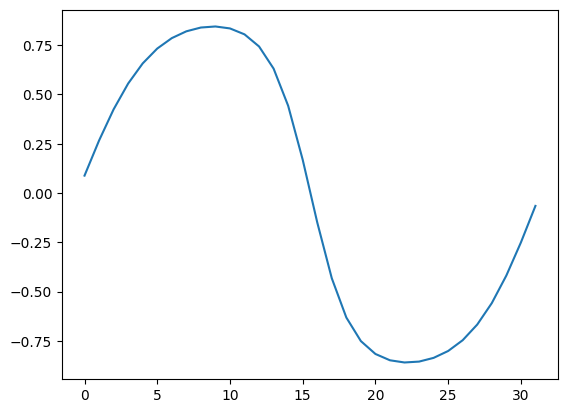

In [14]:
import matplotlib.pyplot as plt

plt.plot(networkForward(neuralNetwork, input))